# Seafood Project
## Data Cleaning

In [1]:
import pandas as pd # data manipulation
import spacy # nlp library

nlp = spacy.load('seafood_model_final') # load in NER model, see results below

sf = pd.read_csv('data/dflabeledtranslated_edited.csv') # load in translated data

sf.head() # view first five rows

,id,name,description,menus_appeared,times_appeared,first_appeared,last_appeared,lowest_price,highest_price,seafood_yn,translatedText
0,2,Chicken gumbo,NaN,111,117,1895,1960,0.10,0.8,0,Chicken gumbo
1,3,Tomato aux croutons,NaN,13,13,1893,1917,0.25,0.4,0,Tomato with croutons
2,4,Onion au gratin,NaN,41,41,1900,1971,0.25,1.0,0,Onion au gratin
3,7,Radishes,NaN,3262,3346,1854,2928,0.00,25.0,0,Radishes
4,8,Chicken soup with rice,NaN,48,49,1897,1961,0.10,0.6,0,Chicken soup with rice


*Results from training on 553 examples:*

|Label    |  Precision |  Recall  | F-Score
| --------  | --------- |  ------  | ------- |
LOCATION   |   73.913 |  77.273  |  75.556
SEAFOOD     |  90.244  | 82.222   | 86.047
METHOD      | 100.000  | 84.615   | 91.667
SIDE        |  76.471  | 59.091  |  66.667

In [2]:
sf = sf[sf['seafood_yn'] == 1] # get only seafood entries

sf = sf.set_index('id') # reset the index to existing

sf.drop(['name', 'description', 'seafood_yn'], axis=1, inplace=True) # drop un-needed cols

sf.head() # preview data

,menus_appeared,times_appeared,first_appeared,last_appeared,lowest_price,highest_price,translatedText
id,,,,,,,
9,14,16,1899,1962,0.15,0.4,Clam broth (cup)
11,157,157,1893,1937,0.25,60.0,Clear green turtle
12,2,2,1900,1900,0.00,0.0,"Striped bass saute, meuniere"
14,4,4,1899,1900,0.00,0.0,Fresh lobsters in every style
17,505,534,1880,1987,0.00,75.0,Caviar


In [3]:
def ent_extract(text):
    doc = nlp(text) # perform nlp on text
    ent_dict = {} # create dictionary to hold entities
    for ent in doc.ents: # for every found entitity
        ent_dict[ent.text.lower()] = ent.label_ # record entity and entity label
    return ent_dict # return all entities found in text

sf['entities'] = sf['translatedText'].apply(ent_extract) # apply new function to data and save in column

sf.head() # preview data

,menus_appeared,times_appeared,first_appeared,last_appeared,lowest_price,highest_price,translatedText,entities
id,,,,,,,,
9,14,16,1899,1962,0.15,0.4,Clam broth (cup),{'clam': 'SEAFOOD'}
11,157,157,1893,1937,0.25,60.0,Clear green turtle,{}
12,2,2,1900,1900,0.00,0.0,"Striped bass saute, meuniere",{'striped bass': 'SEAFOOD'}
14,4,4,1899,1900,0.00,0.0,Fresh lobsters in every style,{'lobsters': 'SEAFOOD'}
17,505,534,1880,1987,0.00,75.0,Caviar,{'caviar': 'SEAFOOD'}


In [4]:
sf = sf[sf['entities'] != {}] # return df when entities isn't empty
sf.head() # view the data

,menus_appeared,times_appeared,first_appeared,last_appeared,lowest_price,highest_price,translatedText,entities
id,,,,,,,,
9,14,16,1899,1962,0.15,0.4,Clam broth (cup),{'clam': 'SEAFOOD'}
12,2,2,1900,1900,0.00,0.0,"Striped bass saute, meuniere",{'striped bass': 'SEAFOOD'}
14,4,4,1899,1900,0.00,0.0,Fresh lobsters in every style,{'lobsters': 'SEAFOOD'}
17,505,534,1880,1987,0.00,75.0,Caviar,{'caviar': 'SEAFOOD'}
18,1425,1484,1856,2928,0.00,50.0,Sardines,{'sardines': 'SEAFOOD'}


In [5]:
sf['entity_count'] = sf['entities'].apply(lambda x: len(x)) # add number of entities per row
sf.head() # view results

,menus_appeared,times_appeared,first_appeared,last_appeared,lowest_price,highest_price,translatedText,entities,entity_count
id,,,,,,,,,
9,14,16,1899,1962,0.15,0.4,Clam broth (cup),{'clam': 'SEAFOOD'},1
12,2,2,1900,1900,0.00,0.0,"Striped bass saute, meuniere",{'striped bass': 'SEAFOOD'},1
14,4,4,1899,1900,0.00,0.0,Fresh lobsters in every style,{'lobsters': 'SEAFOOD'},1
17,505,534,1880,1987,0.00,75.0,Caviar,{'caviar': 'SEAFOOD'},1
18,1425,1484,1856,2928,0.00,50.0,Sardines,{'sardines': 'SEAFOOD'},1


In [6]:
sf['seafood'] = None # initialize empty seafood col
sf['method'] = None # same for method
sf.head() # view results

,menus_appeared,times_appeared,first_appeared,last_appeared,lowest_price,highest_price,translatedText,entities,entity_count,seafood,method
id,,,,,,,,,,,
9,14,16,1899,1962,0.15,0.4,Clam broth (cup),{'clam': 'SEAFOOD'},1,None,None
12,2,2,1900,1900,0.00,0.0,"Striped bass saute, meuniere",{'striped bass': 'SEAFOOD'},1,None,None
14,4,4,1899,1900,0.00,0.0,Fresh lobsters in every style,{'lobsters': 'SEAFOOD'},1,None,None
17,505,534,1880,1987,0.00,75.0,Caviar,{'caviar': 'SEAFOOD'},1,None,None
18,1425,1484,1856,2928,0.00,50.0,Sardines,{'sardines': 'SEAFOOD'},1,None,None


In [7]:
def seafood_col(ent_dict): # takes an entity dictionary as argument
    for key, value in ent_dict.items(): # for each key and value pair
        if value == 'SEAFOOD': # if label is seafood
            return key # return the entity

def method_col(ent_dict): # takes an entity dictionary as argument
    for key, value in ent_dict.items(): # for each key and value pair
        if value == 'METHOD': # if label is method
            return key # return the entity

sf['seafood'] = sf['entities'].apply(seafood_col) # fill seafood column with entities from function
sf['method'] = sf['entities'].apply(method_col) # same for entities
sf.head() # view results

,menus_appeared,times_appeared,first_appeared,last_appeared,lowest_price,highest_price,translatedText,entities,entity_count,seafood,method
id,,,,,,,,,,,
9,14,16,1899,1962,0.15,0.4,Clam broth (cup),{'clam': 'SEAFOOD'},1,clam,None
12,2,2,1900,1900,0.00,0.0,"Striped bass saute, meuniere",{'striped bass': 'SEAFOOD'},1,striped bass,None
14,4,4,1899,1900,0.00,0.0,Fresh lobsters in every style,{'lobsters': 'SEAFOOD'},1,lobsters,None
17,505,534,1880,1987,0.00,75.0,Caviar,{'caviar': 'SEAFOOD'},1,caviar,None
18,1425,1484,1856,2928,0.00,50.0,Sardines,{'sardines': 'SEAFOOD'},1,sardines,None


In [8]:
from nltk.stem import PorterStemmer # import stemmer module
ps = PorterStemmer() # create a stemmer object
# source for stemmer: https://stackoverflow.com/questions/24647400/what-is-the-best-stemming-method-in-python
sf['stem_seafood'] = sf['seafood'].apply(lambda x: ps.stem(x) if x else None) # create a column to stem seafood items
sf['stem_method'] = sf['method'].apply(lambda x: ps.stem(x) if x else None) # same for methods
sf.head() # view new df

,menus_appeared,times_appeared,first_appeared,last_appeared,lowest_price,highest_price,translatedText,entities,entity_count,seafood,method,stem_seafood,stem_method
id,,,,,,,,,,,,,
9,14,16,1899,1962,0.15,0.4,Clam broth (cup),{'clam': 'SEAFOOD'},1,clam,None,clam,None
12,2,2,1900,1900,0.00,0.0,"Striped bass saute, meuniere",{'striped bass': 'SEAFOOD'},1,striped bass,None,striped bass,None
14,4,4,1899,1900,0.00,0.0,Fresh lobsters in every style,{'lobsters': 'SEAFOOD'},1,lobsters,None,lobster,None
17,505,534,1880,1987,0.00,75.0,Caviar,{'caviar': 'SEAFOOD'},1,caviar,None,caviar,None
18,1425,1484,1856,2928,0.00,50.0,Sardines,{'sardines': 'SEAFOOD'},1,sardines,None,sardin,None


In [9]:
sf['stem_method'].unique() # view unique methods

array([None, 'plank', 'broil', 'kipper', 'bake', 'salt codfish,', 'fri',
       'findon', 'boil', 'curri', 'smoke', 'pickl', 'steam', 'stuf',
       'grill', 'devil', 'bropil', 'broth', 'stew', 'hard shell crab',
       'crabs saut', 'neck', 'sand', 'berci', 'cream', 'chicken lobst',
       'bass', 'marin', 'sauté', 'sole fri', 'bouillon',
       'salt codfish cak', 'speckl', 'salt pork', 'scrambl',
       'german soft clam', 'poach', 'sole', 'bay asparagu', 'crack',
       'creme,', 'sauce -', 'creole au', 'milk stew', 'shir', 'salt fish',
       'hash', 'garnish', 'sauce hollandais', 'bred', 'delmonico',
       'striped bass', 'kennebeck', 'stir-fri', 'boston', 'kippur',
       'mill pond', 'german', 'butter', 'newburg includ', 'trout',
       'sauce,', 'dill', 'mix', 'panfri', 'ravioli', 'pack', 'blacken',
       'mustard', 'stew simm', 'maryland', 'salt crust', 'char-gril',
       'sear', 'guacamol'], dtype=object)

In [10]:
def method_normal(method):
    if method != None: # if a method exists, swap out for the below to normalize
        if 'fri' in method:
            return 'fri'
        elif 'salt' in method:
            return 'salt'
        elif 'saut' in method:
            return 'saut'
        elif 'creme' in method:
            return 'cream'
        elif 'stew' in method:
            return 'stew'
        elif 'kippur' in method:
            return 'kipper'
        elif 'gril' in method:
            return 'grill'
        else:
            return method
    else: # otherwise, don't do anything
        pass

sf['stem_method'] = sf['stem_method'].apply(method_normal) # apply function defined above
sf['stem_method'].unique() # review the unique methods

array([None, 'plank', 'broil', 'kipper', 'bake', 'salt', 'fri', 'findon',
       'boil', 'curri', 'smoke', 'pickl', 'steam', 'stuf', 'grill',
       'devil', 'bropil', 'broth', 'stew', 'hard shell crab', 'saut',
       'neck', 'sand', 'berci', 'cream', 'chicken lobst', 'bass', 'marin',
       'bouillon', 'speckl', 'scrambl', 'german soft clam', 'poach',
       'sole', 'bay asparagu', 'crack', 'sauce -', 'creole au', 'shir',
       'hash', 'garnish', 'sauce hollandais', 'bred', 'delmonico',
       'striped bass', 'kennebeck', 'boston', 'mill pond', 'german',
       'butter', 'newburg includ', 'trout', 'sauce,', 'dill', 'mix',
       'ravioli', 'pack', 'blacken', 'mustard', 'maryland', 'sear',
       'guacamol'], dtype=object)

In [11]:
def health_level(method):
    if method != None: # if method is not missing
        if method in ['boil', 'steam', 'poach', 'stew', 'roast', 'saut', 'grill', 'broil', 'bake']:
            return 'healthier' # healthier options
            # source for healthy methods: https://www.verywellfit.com/healthiest-cooking-method-4153101
        elif method in ['fri', 'smoke', 'salt', 'cream', 'butter', 'blacken', 'bred']:
            return 'damaging' # not as healthy or not healthy
            # source for unhealthy methods: https://doctor.ndtv.com/living-healthy/get-rid-of-these-unhealthy-cooking-methods-which-can-make-your-food-toxic-2110173
        else:
            return 'other health level' # other methods found by NER model
    else: # if method is empty
        pass # skip the iteration

sf['health_level'] = sf['stem_method'].apply(health_level) # apply the function defined above
sf.head() # view new data

,menus_appeared,times_appeared,first_appeared,last_appeared,lowest_price,highest_price,translatedText,entities,entity_count,seafood,method,stem_seafood,stem_method,health_level
id,,,,,,,,,,,,,,
9,14,16,1899,1962,0.15,0.4,Clam broth (cup),{'clam': 'SEAFOOD'},1,clam,None,clam,None,None
12,2,2,1900,1900,0.00,0.0,"Striped bass saute, meuniere",{'striped bass': 'SEAFOOD'},1,striped bass,None,striped bass,None,None
14,4,4,1899,1900,0.00,0.0,Fresh lobsters in every style,{'lobsters': 'SEAFOOD'},1,lobsters,None,lobster,None,None
17,505,534,1880,1987,0.00,75.0,Caviar,{'caviar': 'SEAFOOD'},1,caviar,None,caviar,None,None
18,1425,1484,1856,2928,0.00,50.0,Sardines,{'sardines': 'SEAFOOD'},1,sardines,None,sardin,None,None


In [12]:
def fish_fixer(dish): # creating function to handle variances of fish
    if dish != None: # if dish is not missing, replace with variations below
        if 'cod' in dish:
            return 'cod'
        elif 'blue' in dish:
            return 'bluefish'
        elif 'bass' in dish:
            return 'bass'
        else:
            return dish
    else:
        pass # skip over iteration if dish missing

sf['stem_seafood'] = sf['stem_seafood'].apply(fish_fixer) # apply function to data set

In [13]:
sf_method = sf.dropna() # drop missing rows, mostly dropping no method rows
print(f'Length of data with missing methods:\n{len(sf)}\n\nLength of data with no missing methods:\n{len(sf_method)}') # print lengths

Length of data with missing methods:
3969

Length of data with no missing methods:
1214


## Exploration

### Questions

* Which seafood items tend to be the healthiest by method?
    * How can we determine what is healthy and what is not?
* Can we foresee how a seafood will be prepared?
* What is the most common seafood menu items?
* What are the most common seafood cooking methods?

### Plotting

In [14]:
import matplotlib.pyplot as plt # plotting library
import matplotlib.style as style # style wrappers
style.use('fivethirtyeight') # style used by Nate Silver's FiveThirtyEight
import seaborn as sns # wrapper for nicer plots

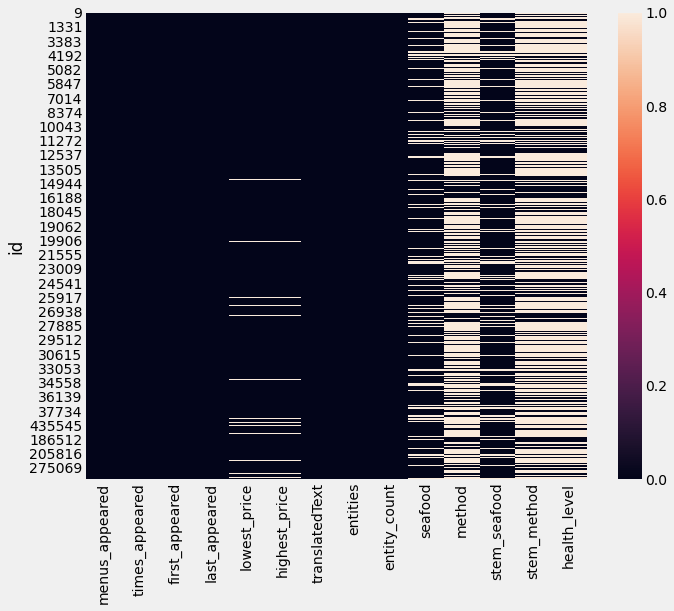

In [15]:
plt.figure(figsize=(10,8)) # set the figure size
sns.heatmap(sf.isna()); # viewing missing values

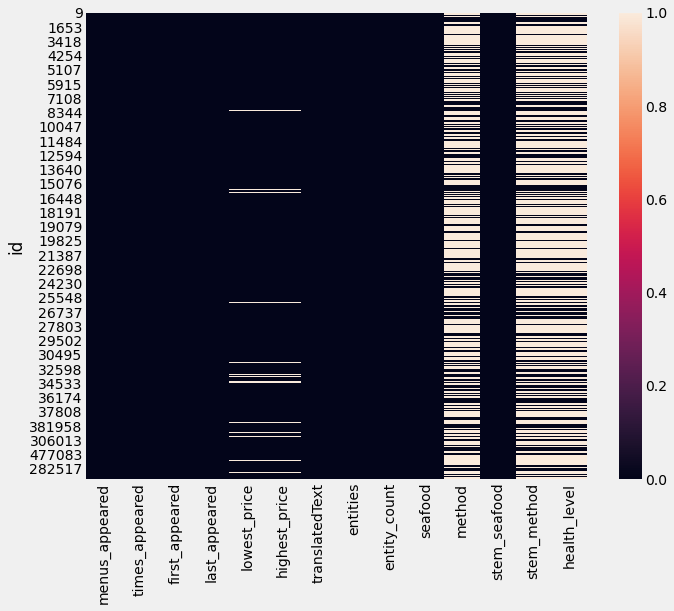

In [16]:
sf = sf.dropna(subset=['stem_seafood']) # dropping rows where seafood is missing
plt.figure(figsize=(10,8)) # set the figure size
sns.heatmap(sf.isna()); # reviewing df after dropping

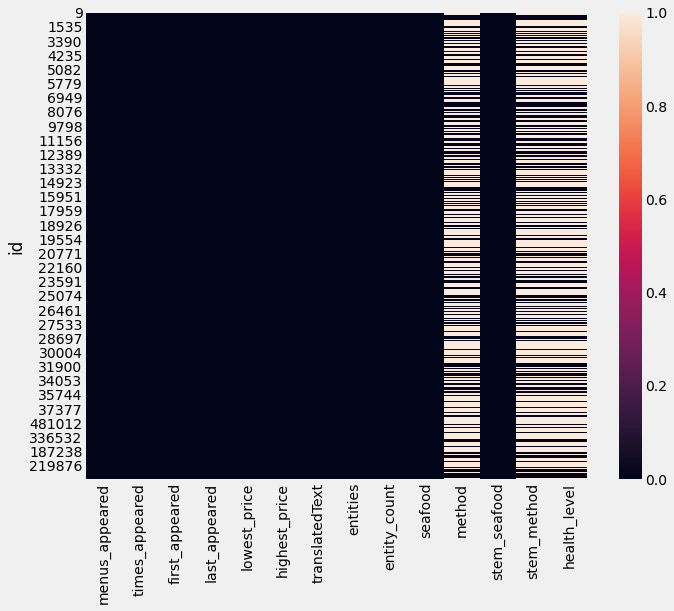

In [17]:
sf = sf.dropna(subset=['lowest_price', 'highest_price']) # dropping rows where price info is missing
plt.figure(figsize=(10,8)) # set the figure size
sns.heatmap(sf.isna()); # reviewing df after dropping

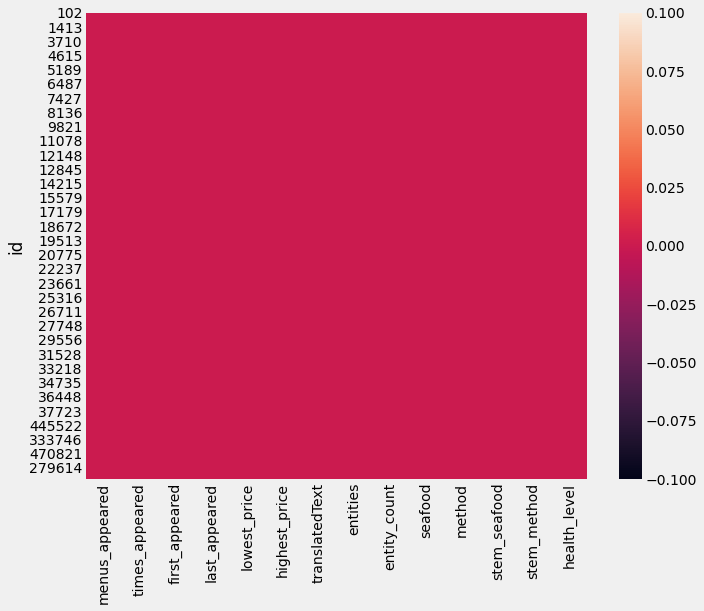

In [18]:
plt.figure(figsize=(10,8)) # set figure size
sns.heatmap(sf_method.isna()); # verify lack of missing values from methods only data set

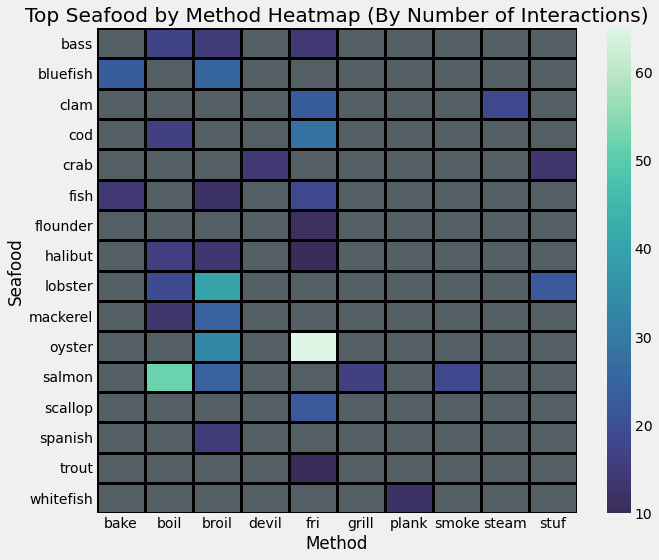

In [19]:
counts = sf_method.groupby(['stem_seafood', 'stem_method'], as_index=False).count()[['stem_seafood', 'stem_method', 'entities']].sort_values('entities', ascending=False) # count how many times seafood is paired with each method
counts_ge10 = counts[counts['entities'] >= 10] # filter to anytime there are more than nine interactions

counts_plot = counts_ge10.pivot_table(values='entities', index='stem_seafood', columns='stem_method') # create df for plotting
plt.figure(figsize=(10,8)) # set the size of the chart
plot = sns.heatmap(counts_plot, linecolor='black', linewidths=3, cmap='mako', center=30) # create the heatmap
plot.set_facecolor('#535F64') # set value for missing data cells
plt.title('Top Seafood by Method Heatmap (By Number of Interactions)') # add title
plt.xlabel('Method') # add x label
plt.ylabel('Seafood'); # add y label
plt.tight_layout() # formats for saving figure
plt.savefig('plots/top_seafood_by_method_hm.png') # save figure
# source for set_facecolor: https://stackoverflow.com/questions/52399990/change-color-of-missing-values-in-seaborn-heatmap

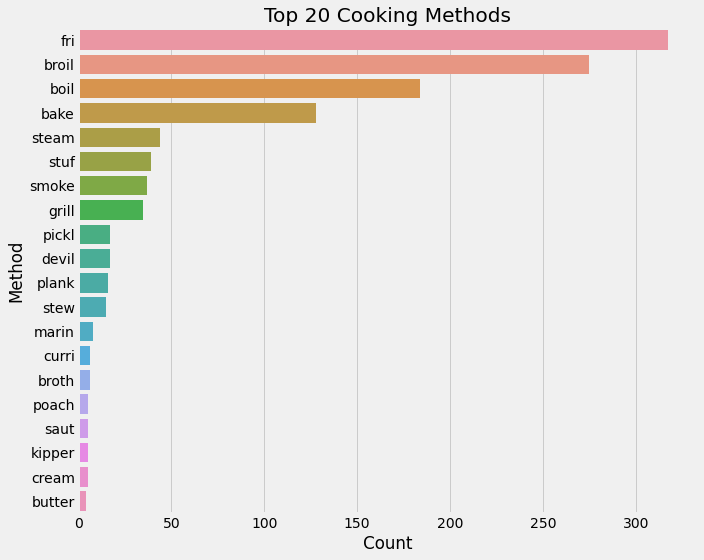

In [20]:
top_20_methods = sf_method['stem_method'].value_counts().iloc[:20] # create data for top 20 plot

plt.figure(figsize=(10,8)) # set the size of the chart
sns.barplot(x=top_20_methods, y=top_20_methods.index) # make the bar plot
plt.title('Top 20 Cooking Methods') # add title
plt.ylabel('Method') # add y label
plt.xlabel('Count'); # add x label
plt.tight_layout() # formats for saving figure
plt.savefig('plots/top_20_methods.png') # save figure

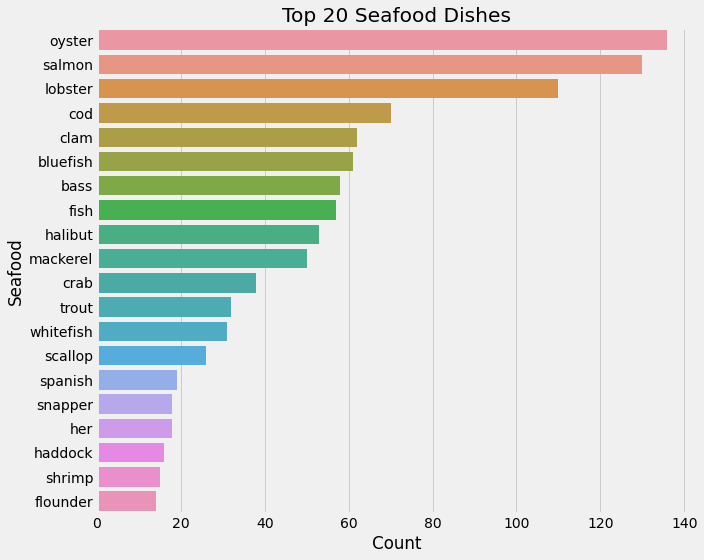

In [21]:
top_20_dishes = sf_method['stem_seafood'].value_counts().iloc[:20] # create data for top 20 plot

plt.figure(figsize=(10,8)) # set the size of the chart
sns.barplot(x=top_20_dishes, y=top_20_dishes.index) # make the bar plot
plt.title('Top 20 Seafood Dishes') # add title
plt.ylabel('Seafood') # add y label
plt.xlabel('Count'); # add x label
plt.tight_layout() # formats for saving figure
plt.savefig('plots/top_20_seafood.png') # save figure

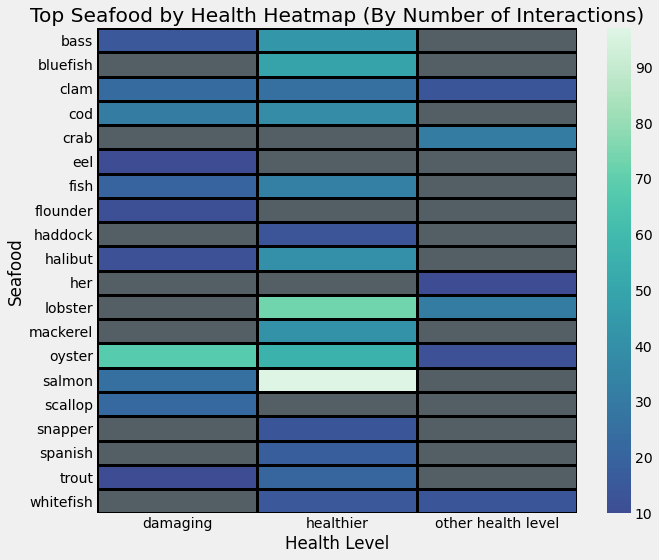

In [22]:
counts = sf.groupby(['stem_seafood', 'health_level'], as_index=False).count()[['stem_seafood', 'health_level', 'entities']].sort_values('entities', ascending=False) # count how many times seafood is paired with each health level
counts_ge10 = counts[counts['entities'] >= 10] # filter to anytime there are more than nine interactions

counts_plot = counts_ge10.pivot_table(values='entities', index='stem_seafood', columns='health_level') # create df for plotting
plt.figure(figsize=(10,8)) # set the size of the chart
plot = sns.heatmap(counts_plot, linecolor='black', linewidths=3, cmap='mako', center=30) # create the heatmap
plot.set_facecolor('#535F64') # set value for missing data cells
plt.title('Top Seafood by Health Heatmap (By Number of Interactions)') # add title
plt.xlabel('Health Level') # add x label
plt.ylabel('Seafood'); # add y label
plt.tight_layout() # formats for saving figure
plt.savefig('plots/top_seafood_by_health_hm.png') # save figure
# source for set_facecolor: https://stackoverflow.com/questions/52399990/change-color-of-missing-values-in-seaborn-heatmap

* Going to use method data for modeling.

### Feature Engineering

In [23]:
sf_method.describe()

,menus_appeared,times_appeared,first_appeared,last_appeared,lowest_price,highest_price,entity_count
count,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000
mean,8.621087,8.943163,1900.176277,1918.145799,1.005181,3.089498,2.862438
std,28.191076,30.404650,115.665330,84.361308,7.422653,12.603563,0.991317
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,1.000000,1.000000,1900.000000,1900.000000,0.000000,0.000000,2.000000
50%,2.000000,2.000000,1900.000000,1901.000000,0.200000,0.300000,3.000000
75%,4.000000,4.750000,1901.000000,1919.000000,0.400000,0.650000,3.000000
max,591.000000,638.000000,2928.000000,2928.000000,215.000000,215.000000,11.000000


In [24]:
sf_method = sf_method[(sf_method['first_appeared'] < 2021) & (sf_method['first_appeared'] > 1800)] # removing weird date entries
sf_method = sf_method[(sf_method['last_appeared'] < 2021) & (sf_method['last_appeared'] > 1800)] # same for last appeared entries

In [25]:
# sns.pairplot(sf_method); # view numerical variables in a pairplot

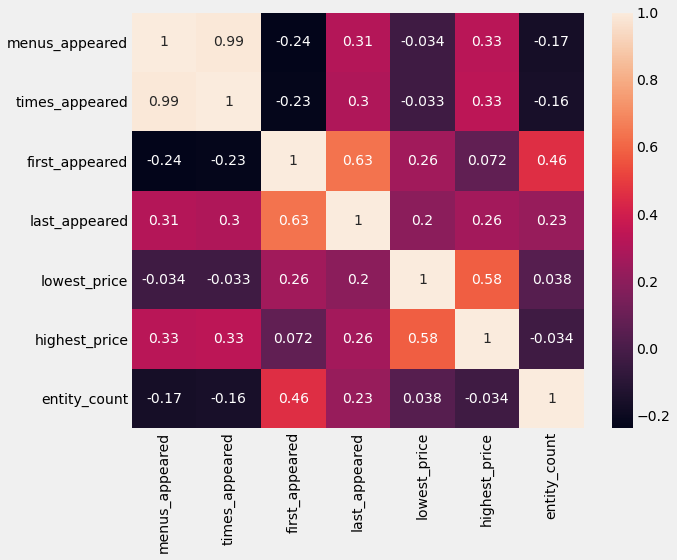

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(sf_method.corr(), annot=True) # create correlation plot
plt.tight_layout()
plt.savefig('plots/corrplot_full.png');

C:\Users\jpzam\Projects\venvs\prodigy\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


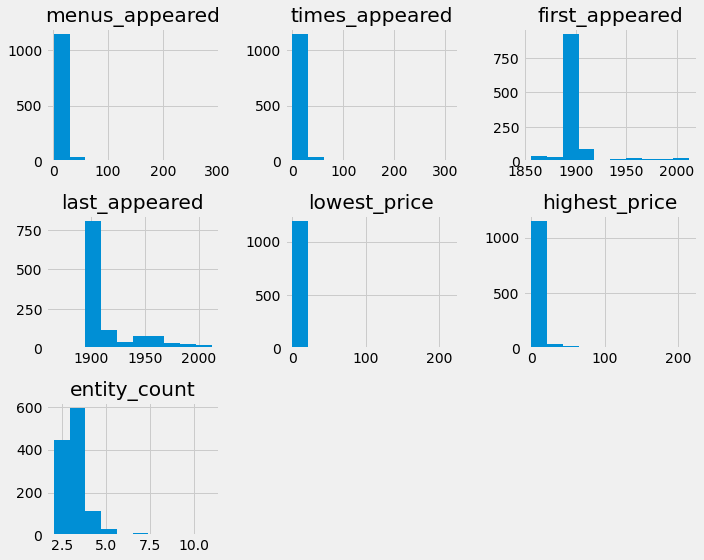

In [27]:
sf_method.hist(figsize=(10,8)) # univariate exploration
plt.tight_layout(); # clean up the plot printing

In [28]:
import numpy as np # linear algebra module

In [29]:
num_cols = sf_method.select_dtypes('number').columns # getting list of numerical columns

In [30]:
sf_method[num_cols].describe()

,menus_appeared,times_appeared,first_appeared,last_appeared,lowest_price,highest_price,entity_count
count,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000
mean,7.565506,7.837479,1905.623549,1916.224710,1.011020,3.021103,2.864013
std,20.652717,22.495479,24.181078,26.664134,7.446882,12.499063,0.988607
min,1.000000,0.000000,1856.000000,1865.000000,0.000000,0.000000,2.000000
25%,1.000000,1.000000,1900.000000,1900.000000,0.000000,0.000000,2.000000
50%,2.000000,2.000000,1900.000000,1901.000000,0.200000,0.300000,3.000000
75%,4.000000,4.000000,1901.000000,1918.000000,0.400000,0.600000,3.000000
max,289.000000,311.000000,2012.000000,2012.000000,215.000000,215.000000,11.000000


In [31]:
sf_method['price_dif'] = sf_method['highest_price'] - sf_method['lowest_price'] # making a price difference field
sf_method['appear_dif'] = sf_method['times_appeared'] - sf_method['menus_appeared'] # making menu and total appearance difference field'
sf_method['years_seen'] = sf_method['last_appeared'] - sf_method['first_appeared'] # counting years seen across data set
sf_method.head() # view new fields

,menus_appeared,times_appeared,first_appeared,last_appeared,lowest_price,highest_price,translatedText,entities,entity_count,seafood,method,stem_seafood,stem_method,health_level,price_dif,appear_dif,years_seen
id,,,,,,,,,,,,,,,,,
102,41,44,1856,1957,0.30,2.50,Broiled Mackerel,"{'broiled': 'METHOD', 'mackerel': 'SEAFOOD'}",2,mackerel,broiled,mackerel,broil,healthier,2.20,3,101
134,2,2,1900,1900,0.60,0.60,"Baked bluefish, Duxelle","{'baked': 'METHOD', 'bluefish': 'SEAFOOD', 'du...",3,bluefish,baked,bluefish,bake,healthier,0.00,0,0
183,3,3,1901,1901,0.00,0.00,"Salt Codfish, Spanish Style","{'salt codfish,': 'METHOD', 'spanish': 'SEAFOOD'}",2,spanish,"salt codfish,",spanish,salt,damaging,0.00,0,0
191,10,10,1900,1901,0.15,15.00,Fried Flounders,"{'fried': 'METHOD', 'flounders': 'SEAFOOD'}",2,flounders,fried,flounder,fri,damaging,14.85,0,1
194,112,112,1856,1971,0.00,1.75,Fried fish,"{'fried': 'METHOD', 'fish': 'SEAFOOD'}",2,fish,fried,fish,fri,damaging,1.75,0,115


In [32]:
sf_method[['price_dif', 'appear_dif', 'years_seen']].describe()

,price_dif,appear_dif,years_seen
count,1206.000000,1206.000000,1206.000000
mean,2.010083,0.271973,10.601161
std,10.177444,3.817713,21.910477
min,0.000000,-1.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.150000,0.000000,7.000000
max,149.450000,128.000000,128.000000


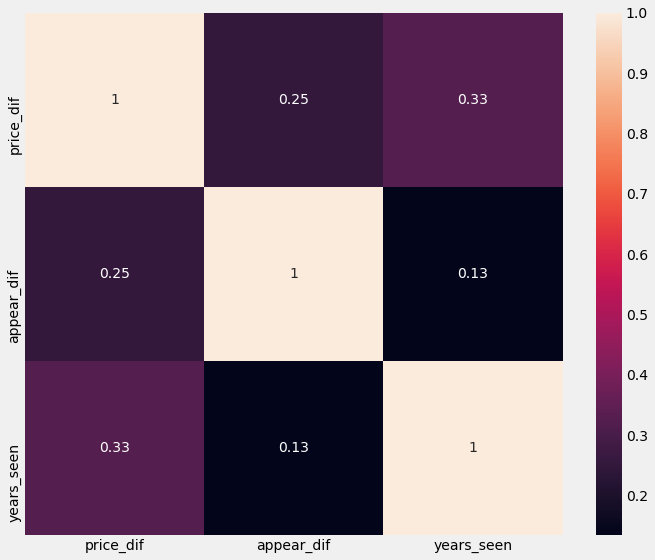

In [33]:
plt.figure(figsize=(10,8))
sns.heatmap(sf_method[['price_dif', 'appear_dif', 'years_seen']].corr(), annot=True)
plt.tight_layout()
plt.savefig('plots/corrplot_feats.png');

<Figure size 720x576 with 0 Axes>

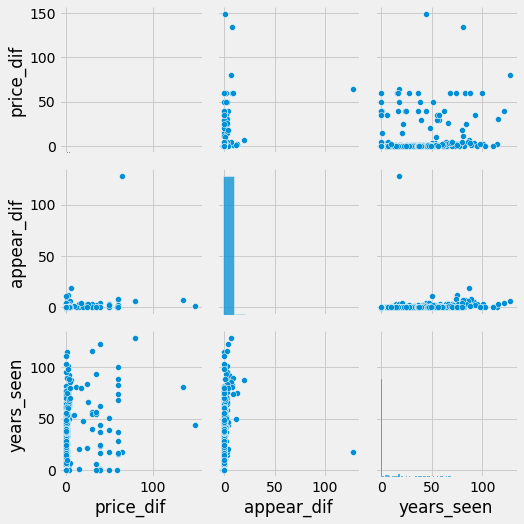

In [34]:
plt.figure(figsize=(10,8))
sns.pairplot(sf_method[['price_dif', 'appear_dif', 'years_seen']])
plt.tight_layout()
plt.savefig('plots/pairplot_feats.png');

In [35]:
sf_method = sf_method[sf_method['health_level'] != 'other health level'] # removing third health class

In [36]:
seafoods = sf_method['stem_seafood'].value_counts().iloc[:33].index # select dishes with more than 4 instances

In [37]:
sf_method = sf_method[sf_method['stem_seafood'].isin(seafoods)] # filtering to data with more than 4 instances

In [38]:
sf_method[['price_dif', 'appear_dif', 'years_seen']].describe()

,price_dif,appear_dif,years_seen
count,964.000000,964.000000,964.000000
mean,2.192334,0.312241,11.262448
std,10.903485,4.219450,22.667597
min,0.000000,-1.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.150000,0.000000,8.000000
max,149.450000,128.000000,128.000000


In [39]:
sf_method['over_8_years'] = sf_method['years_seen'].apply(lambda x: 1 if x >= 8 else 0).copy() # creating binary var for if item seen over 8 years
sf_method['price_difference'] = sf_method['price_dif'].apply(lambda x: 1 if x > 0 else 0).copy() # binary var for if there's a difference in price
sf_method['appear_difference'] = sf_method['appear_dif'].apply(lambda x: 1 if x > 0 else 0).copy() # binary var if there's a difference in menus seen and appearance

In [40]:
sf_final = sf_method[['health_level', 'over_8_years', 'price_difference', 'appear_difference', 'stem_seafood']] # final dataset for modeling

In [41]:
sf_final.head() # view data

,health_level,over_8_years,price_difference,appear_difference,stem_seafood
id,,,,,
102,healthier,1,1,1,mackerel
134,healthier,0,0,0,bluefish
183,damaging,0,0,0,spanish
191,damaging,0,1,0,flounder
194,damaging,1,1,0,fish


In [42]:
for col in sf_final.columns:
    sf_final[col] = sf_final[col].astype('category')

<ipython-input-42-58b9999a3360>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sf_final[col] = sf_final[col].astype('category')


In [43]:
sf_final['health_level'] = sf_final['health_level'].cat.codes.values
sf_final.head()

<ipython-input-43-c4c68de9ccfb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sf_final['health_level'] = sf_final['health_level'].cat.codes.values


,health_level,over_8_years,price_difference,appear_difference,stem_seafood
id,,,,,
102,1,1,1,1,mackerel
134,1,0,0,0,bluefish
183,0,0,0,0,spanish
191,0,0,1,0,flounder
194,0,1,1,0,fish


## Modeling

### Data Prep

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X = sf_final.drop('health_level', axis=1)
X_dums = pd.get_dummies(X['stem_seafood'])
X = pd.concat([X.drop('stem_seafood', axis=1), X_dums], axis=1)
y = sf_final['health_level']

In [46]:
y.unique()

array([1, 0], dtype=int8)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression

In [48]:
import statsmodels.api as sm

In [49]:
log_reg = sm.Logit(y_train, X_train,)
results = log_reg.fit(method='bfgs')

         Current function value: 0.532434
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


C:\Users\jpzam\Projects\venvs\prodigy\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [50]:
print(results.summary())

                           Logit Regression Results                           
Dep. Variable:           health_level   No. Observations:                  771
Model:                          Logit   Df Residuals:                      735
Method:                           MLE   Df Model:                           35
Date:                Wed, 14 Apr 2021   Pseudo R-squ.:                  0.1757
Time:                        18:44:19   Log-Likelihood:                -410.51
converged:                      False   LL-Null:                       -498.03
Covariance Type:            nonrobust   LLR p-value:                 1.557e-20
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
over_8_years         -0.1513      0.268     -0.564      0.573      -0.677       0.374
price_difference     -0.1246      0.258     -0.483      0.629      -0.630       0.381
appear_difference    -0.

In [51]:
log_reg_red = sm.Logit(y_train, X_train.drop(['over_8_years', 'price_difference', 'appear_difference'], axis=1))
results = log_reg_red.fit(method='bfgs')

         Current function value: 0.531423
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38


C:\Users\jpzam\Projects\venvs\prodigy\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [52]:
print(results.summary())

                           Logit Regression Results                           
Dep. Variable:           health_level   No. Observations:                  771
Model:                          Logit   Df Residuals:                      738
Method:                           MLE   Df Model:                           32
Date:                Wed, 14 Apr 2021   Pseudo R-squ.:                  0.1773
Time:                        18:44:19   Log-Likelihood:                -409.73
converged:                      False   LL-Null:                       -498.03
Covariance Type:            nonrobust   LLR p-value:                 6.379e-22
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
bass           1.1232      0.343      3.278      0.001       0.452       1.795
bluefish       1.6237      0.393      4.129      0.000       0.853       2.394
clam                0      0.333          0      1.0

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, auc, roc_curve

In [54]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [55]:
preds = lr.predict(X_test)

In [56]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.64      0.52      0.57        56
           1       0.82      0.88      0.85       137

    accuracy                           0.78       193
   macro avg       0.73      0.70      0.71       193
weighted avg       0.77      0.78      0.77       193



In [57]:
fpr, tpr, thresholds = roc_curve(y_test, preds)
auc(fpr, tpr)

0.7005344108446299

### Deep Learning

In [58]:
import numpy as np
import pandas as pd
import torch 
import torch.nn as nn
import torch.optim as optim
from sklearn.utils import shuffle
from sklearn import metrics

In [59]:
sf_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 964 entries, 102 to 487563
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   health_level       964 non-null    int8    
 1   over_8_years       964 non-null    category
 2   price_difference   964 non-null    category
 3   appear_difference  964 non-null    category
 4   stem_seafood       964 non-null    category
dtypes: category(4), int8(1)
memory usage: 13.9 KB


In [60]:
df = shuffle(sf_final, random_state=1) # shuffle data for splitting later

In [61]:
df['health_level'] = df['health_level'].astype('category') # converting to category here also

In [62]:
cat_cols = df[['over_8_years', 'price_difference', 'appear_difference', 'stem_seafood']] # select categorical cols

In [63]:
y_col = ['health_level'] # set y col name as list to return as df later
y_col_name = 'health_level' # set y col name without list
k_class = len(df[y_col_name].cat.categories) # get the number of classes in target

In [64]:
cats = torch.tensor(np.stack([df[col].cat.codes.values for col in cat_cols], axis=1), dtype=torch.int) # convert categorical features to tensors

In [65]:
y = torch.tensor(df[y_col_name].cat.codes.values, dtype=torch.int) # set target variable as tensor

In [66]:
cat_sizes = [len(df[col].cat.categories) for col in cat_cols] # size of unique categories per category column

In [67]:
emb_sizes = [(size, min(50, (size + 1) // 2)) for size in cat_sizes] # get the size of the category embeddings

In [68]:
class TabularModel(nn.Module):
    
    def __init__(self, embedding_sizes, output_size, layers, p_dropout):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in embedding_sizes])
        self.embed_drop = nn.Dropout(p_dropout)
#         self.bn_num_var = nn.BatchNorm1d(n_num_var)
        layerlist = []
        n_embeds = sum([nf for ni, nf in embedding_sizes])
        n_input = n_embeds
        for i in layers:
            layerlist.append(nn.Linear(n_input, i))
            layerlist.append(nn.ReLU(inplace=True))
#             layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p_dropout))
            n_input = i
        layerlist.append(nn.Linear(layers[-1], output_size))
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat):
        embeddings = []
        for i, e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.embed_drop(x)
#         x_num = self.bn_num_var(x_num)
#         x = torch.cat([x, x_num], 1)
        x = self.layers(x)
        return x

In [69]:
torch.manual_seed(1)
model = TabularModel(emb_sizes, k_class, [20, 20, 20], 0.2)

In [70]:
criterion = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [71]:
batch_size = len(df)
test_size = int(batch_size * 0.2)

In [72]:
cat_train = cats[:batch_size - test_size]
cat_test = cats[batch_size - test_size:batch_size]

In [73]:
y_train = y[:batch_size - test_size]
y_test = y[batch_size - test_size:batch_size]

In [74]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [75]:
model.to(device)

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(2, 1)
    (1): Embedding(2, 1)
    (2): Embedding(2, 1)
    (3): Embedding(33, 17)
  )
  (embed_drop): Dropout(p=0.2, inplace=False)
  (layers): Sequential(
    (0): Linear(in_features=20, out_features=20, bias=True)
    (1): ReLU(inplace=True)
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=20, out_features=20, bias=True)
    (4): ReLU(inplace=True)
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=20, out_features=20, bias=True)
    (7): ReLU(inplace=True)
    (8): Dropout(p=0.2, inplace=False)
    (9): Linear(in_features=20, out_features=2, bias=True)
  )
)

In [76]:
import time
start_time = time.time()
epochs = 300
losses = []
for i in range(epochs):
    i += 1
    y_pred = model(cat_train.to(device))
    loss = criterion(y_pred.to(device), y_train.long().to(device))
    losses.append(loss)
    if i % 25 == 1:
        print(f'Epoch: {i:3} | Loss: {loss:5.2f}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
duration = time.time() - start_time
print(f'Training took {(duration / 60):5.2f} minutes.')

Epoch:   1 | Loss:  0.69
Epoch:  26 | Loss:  0.64
Epoch:  51 | Loss:  0.62
Epoch:  76 | Loss:  0.60
Epoch: 101 | Loss:  0.58
Epoch: 126 | Loss:  0.58
Epoch: 151 | Loss:  0.56
Epoch: 176 | Loss:  0.56
Epoch: 201 | Loss:  0.56
Epoch: 226 | Loss:  0.56
Epoch: 251 | Loss:  0.55
Epoch: 276 | Loss:  0.54
Training took  0.02 minutes.


In [77]:
loss_list = []
for l in losses:
    loss_list.append(l.detach().cpu().item())

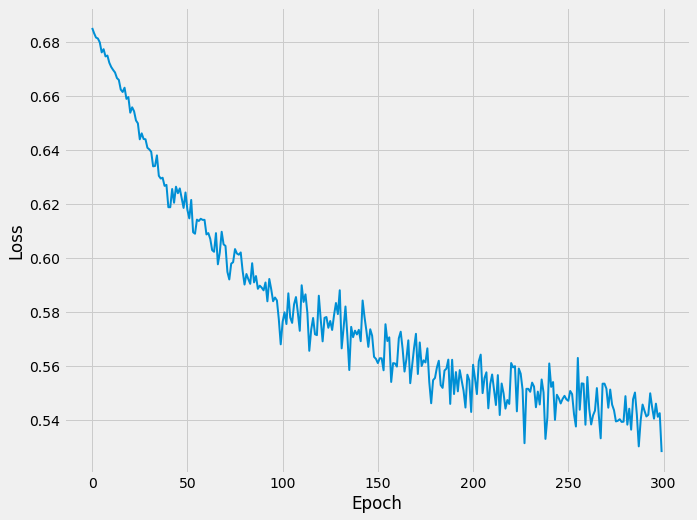

In [78]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.plot(range(epochs), loss_list, lw=2)
plt.ylabel('Loss')
plt.xlabel('Epoch');

In [79]:
with torch.no_grad():
    y_val = model(cat_test.to(device))
    loss = criterion(y_val.to(device), y_test.long().to(device))

In [80]:
print(f'{loss.item():.2f}')

0.55


In [81]:
rows = len(y_test)
preds = []
y_true = []
for i in range(rows):
    preds.append(y_val[i].argmax().item())
    y_true.append(y_test[i].item())

In [82]:
from sklearn import metrics

In [83]:
print(f'F1-score: {metrics.f1_score(y_true, preds, average="weighted"):2.2f} | Precision: {metrics.precision_score(y_true, preds, average="weighted", zero_division=0):2.2f} | Recall: {metrics.recall_score(y_true, preds, average="weighted", zero_division=0):2.2f}')

F1-score: 0.69 | Precision: 0.69 | Recall: 0.70


In [84]:
print(metrics.classification_report(y_true, preds))

              precision    recall  f1-score   support

           0       0.58      0.43      0.50        65
           1       0.74      0.84      0.79       127

    accuracy                           0.70       192
   macro avg       0.66      0.64      0.64       192
weighted avg       0.69      0.70      0.69       192



### Add Calories

In [85]:
cals = pd.read_csv('data/calories.csv')

In [86]:
cals = cals.fillna(method='backfill')

<AxesSubplot:>

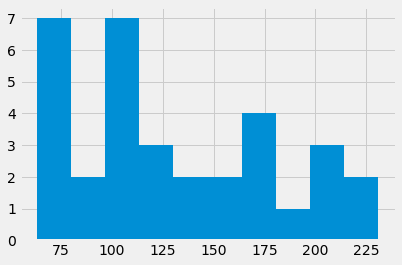

In [87]:
cals['cals_per_serving'].hist()

(array([3., 4., 2., 4., 5., 2., 3., 4., 1., 5.]),
 array([4.14313473, 4.27306302, 4.40299132, 4.53291962, 4.66284792,
        4.79277622, 4.92270452, 5.05263282, 5.18256111, 5.31248941,
        5.44241771]),
 <BarContainer object of 10 artists>)

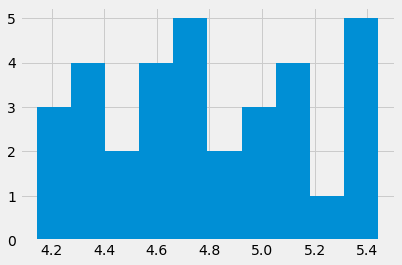

In [88]:
plt.hist(np.log(cals['cals_per_serving']))

In [89]:
cals['log_cals'] = np.log(cals['cals_per_serving'])

In [90]:
cals.head()

,stem_seafood,cals_per_serving,log_cals
0,bass,110.0,4.700480
1,oyster,175.0,5.164786
2,mackerel,231.0,5.442418
3,shrimp,90.0,4.499810
4,scallop,75.0,4.317488


In [91]:
df = pd.merge(df, cals).drop('cals_per_serving', axis=1)
df.head()

,health_level,over_8_years,price_difference,appear_difference,stem_seafood,log_cals
0,1,0,0,0,bass,4.70048
1,0,0,0,0,bass,4.70048
2,0,0,0,0,bass,4.70048
3,1,0,0,0,bass,4.70048
4,1,0,0,0,bass,4.70048


### Deep Learning Round 2

In [176]:
import numpy as np
import pandas as pd
import torch 
import torch.nn as nn
import torch.optim as optim
from sklearn.utils import shuffle
from sklearn import metrics

In [177]:
df = shuffle(df, random_state=1) # shuffle data for splitting later

In [178]:
cat_cols = df[['over_8_years', 'price_difference', 'appear_difference', 'stem_seafood']] # select categorical cols

In [179]:
num_cols = ['log_cals'] # select numerical cols

In [180]:
df['stem_seafood'] = cat_cols['stem_seafood'].astype('category')

In [181]:
y_col = ['health_level'] # set y col name as list to return as df later
y_col_name = 'health_level' # set y col name without list
k_class = len(df[y_col_name].cat.categories) # get the number of classes in target

In [182]:
cats = torch.tensor(np.stack([df[col].cat.codes.values for col in cat_cols], axis=1), dtype=torch.int) # convert categorical features to tensors
nums = torch.tensor(np.stack([df[col].values for col in num_cols], axis=1), dtype=torch.float) # convert numerical features to tensors

In [183]:
y = torch.tensor(df[y_col_name].cat.codes.values, dtype=torch.int) # set target variable as tensor

In [184]:
cat_sizes = [len(df[col].cat.categories) for col in cat_cols] # size of unique categories per category column

In [185]:
emb_sizes = [(size, min(50, (size + 1) // 2)) for size in cat_sizes] # get the size of the category embeddings

In [186]:
class TabularModelCals(nn.Module):
    
    def __init__(self, embedding_sizes, n_num_var, output_size, layers, p_dropout):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in embedding_sizes])
        self.embed_drop = nn.Dropout(p_dropout)
        self.bn_num_var = nn.BatchNorm1d(n_num_var)
        layerlist = []
        n_embeds = sum([nf for ni, nf in embedding_sizes])
        n_input = n_embeds + n_num_var
        for i in layers:
            layerlist.append(nn.Linear(n_input, i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p_dropout))
            n_input = i
        layerlist.append(nn.Linear(layers[-1], output_size))
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_num):
        embeddings = []
        for i, e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.embed_drop(x)
        x_num = self.bn_num_var(x_num)
        x = torch.cat([x, x_num], 1)
        x = self.layers(x)
        return x

In [187]:
torch.manual_seed(1)
model = TabularModelCals(emb_sizes, nums.shape[1], k_class, [21, 21, 21], 0.2)

In [188]:
criterion = nn.CrossEntropyLoss()
learning_rate = 0.0001
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [189]:
batch_size = len(df)
test_size = int(batch_size * 0.2)

In [190]:
cat_train = cats[:batch_size - test_size]
cat_test = cats[batch_size - test_size:batch_size]

In [191]:
num_train = nums[:batch_size - test_size]
num_test = nums[batch_size - test_size:batch_size]

In [192]:
y_train = y[:batch_size - test_size]
y_test = y[batch_size - test_size:batch_size]

In [193]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [194]:
model.to(device)

TabularModelCals(
  (embeds): ModuleList(
    (0): Embedding(2, 1)
    (1): Embedding(2, 1)
    (2): Embedding(2, 1)
    (3): Embedding(33, 17)
  )
  (embed_drop): Dropout(p=0.2, inplace=False)
  (bn_num_var): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=21, out_features=21, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(21, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=21, out_features=21, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(21, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.2, inplace=False)
    (8): Linear(in_features=21, out_features=21, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(21, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.2, inplace=False)
    (12): Linear(in_features=21, out_

In [195]:
import time
start_time = time.time()
epochs = 2000
losses = []
for i in range(epochs):
    i += 1
    y_pred = model(cat_train.to(device), num_train.to(device))
    loss = criterion(y_pred.to(device), y_train.long().to(device))
    losses.append(loss)
    if i % 500 == 1:
        print(f'Epoch: {i:3} | Loss: {loss:5.2f}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
duration = time.time() - start_time
print(f'Training took {(duration / 60):5.2f} minutes.')

Epoch:   1 | Loss:  0.73
Epoch: 501 | Loss:  0.62
Epoch: 1001 | Loss:  0.61
Epoch: 1501 | Loss:  0.57
Training took  0.19 minutes.


In [196]:
loss_list = []
for l in losses:
    loss_list.append(l.detach().cpu().item())

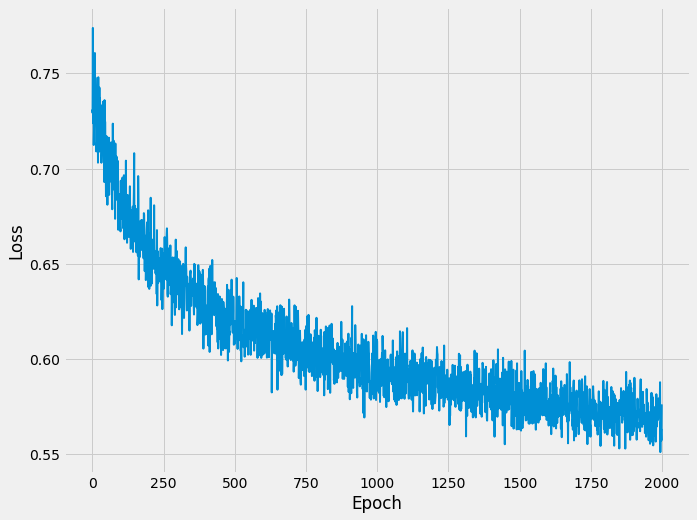

In [197]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.plot(range(epochs), loss_list, lw=2)
plt.ylabel('Loss')
plt.xlabel('Epoch');

In [198]:
with torch.no_grad():
    y_val = model(cat_test.to(device), num_test.to(device))
    loss = criterion(y_val.to(device), y_test.long().to(device))

In [199]:
print(f'{loss.item():.2f}')

0.55


In [200]:
rows = len(y_test)
preds = []
y_true = []
for i in range(rows):
    preds.append(y_val[i].argmax().item())
    y_true.append(y_test[i].item())

In [201]:
from sklearn import metrics

In [202]:
print(f'F1-score: {metrics.f1_score(y_true, preds, average="weighted"):2.2f} | Precision: {metrics.precision_score(y_true, preds, average="weighted", zero_division=0):2.2f} | Recall: {metrics.recall_score(y_true, preds, average="weighted", zero_division=0):2.2f}')

F1-score: 0.70 | Precision: 0.70 | Recall: 0.72


In [203]:
print(metrics.classification_report(y_true, preds))

              precision    recall  f1-score   support

           0       0.54      0.35      0.43        57
           1       0.76      0.87      0.81       135

    accuracy                           0.72       192
   macro avg       0.65      0.61      0.62       192
weighted avg       0.70      0.72      0.70       192

